In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure inline plotting
%matplotlib inline

In [2]:
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Cleaned-Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Age,Weight_kg,Height_ft,Marital_Status,PCOS,Family_History_PCOS,Menstrual_Irregularity,Hormonal_Imbalance,Hyperandrogenism,Hirsutism,...,Diet_Multivitamin,Vegetarian,Exercise_Frequency,Exercise_Type,Exercise_Duration,Sleep_Hours,Stress_Level,Smoking,Exercise_Benefit,PCOS_Medication
0,20-25,66.0,157.48,Unmarried,No,No,Yes,No,No,No,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",30 minutes,Less than 6 hours,No,No,Somewhat,No.
1,Less than 20,56.0,165.10,Unmarried,No,No,No,No,No,No,...,0,No,Daily,No Exercise,Less than 30 minutes,6-8 hours,No,No,Somewhat,No.
2,Less than 20,89.0,167.64,Unmarried,No,Yes,No,No,No,Yes,...,0,No,Rarely,"Cardio (e.g., running, cycling, swimming)",Less than 30 minutes,6-8 hours,Yes,No,Somewhat,No.
3,20-25,55.0,160.02,Unmarried,No,Yes,No,Yes,No,Yes,...,1,No,Never,No Exercise,Not Applicable,6-8 hours,Yes,No,Somewhat,No.
4,Less than 20,55.0,160.02,Unmarried,No,No,No,No,No,No,...,0,No,Daily,"Cardio (e.g., running, cycling, swimming)",30 minutes to 1 hour,6-8 hours,Yes,No,Not at All,No.


In [3]:
df.isnull().sum()

Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                          0
Family_History_PCOS           0
Menstrual_Irregularity        0
Hormonal_Imbalance            0
Hyperandrogenism              0
Hirsutism                     0
Mental_Health                 0
Conception_Difficulty         0
Insulin_Resistance            0
Diabetes                      0
Childhood_Trauma              0
Cardiovascular_Disease        0
Diet_Bread_Cereals            0
Diet_Milk_Products            0
Diet_Fruits                   0
Diet_Vegetables               0
Diet_Starchy_Vegetables       0
Diet_NonStarchy_Vegetables    0
Diet_Fats                     0
Diet_Sweets                   0
Diet_Fried_Food               0
Diet_Tea_Coffee               0
Diet_Multivitamin             0
Vegetarian                    0
Exercise_Frequency            0
Exercise_Type                 0
Exercise_Duration             0
Sleep_Ho

In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the encoded and scaled dataset
df_encoded.head()

,Weight_kg,Height_ft,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,...,Exercise_Benefit_Somewhat,Exercise_Benefit_Yes Significantly,PCOS_Medication_Herbal,PCOS_Medication_I took as endocrinologist prescribed me but she said that I don't have PCOS,"PCOS_Medication_I used to take medicine for almost two years, but it had no significant effects. One thing I added to my daily routine is walking for half an hour or more, which has significantly improved my periods.Also recommended my doctors.","PCOS_Medication_Multivitamins, Inositol",PCOS_Medication_No.,PCOS_Medication_Option 2,"PCOS_Medication_Yes, hormonal therapy (e.g., birth control pills)",PCOS_Medication_Yes.. but rn i stopped medication and start organic seeds that helps me a lot
0,0.788144,-0.434424,0.736679,1.319116,-0.506552,-0.815714,-0.037460,-0.851019,1.079102,-0.275043,...,True,False,False,False,False,False,True,False,False,False
1,-0.045845,0.614255,-0.684646,0.138735,0.472593,0.317768,0.502590,-0.264460,-0.232500,-1.609132,...,True,False,False,False,False,False,True,False,False,False
2,2.706319,0.963815,0.262904,-0.648186,-0.996124,-0.248973,-0.577511,-0.851019,1.079102,-1.164436,...,True,False,False,False,False,False,True,False,False,False
3,-0.129244,-0.084864,-1.632197,-0.254726,-0.996124,-0.815714,1.042641,0.322099,0.204701,0.614349,...,True,False,False,False,False,False,True,False,False,False
4,-0.129244,-0.084864,-0.684646,1.319116,-0.506552,-0.248973,0.502590,0.908657,0.641901,-0.719740,...,False,False,False,False,False,False,True,False,False,False


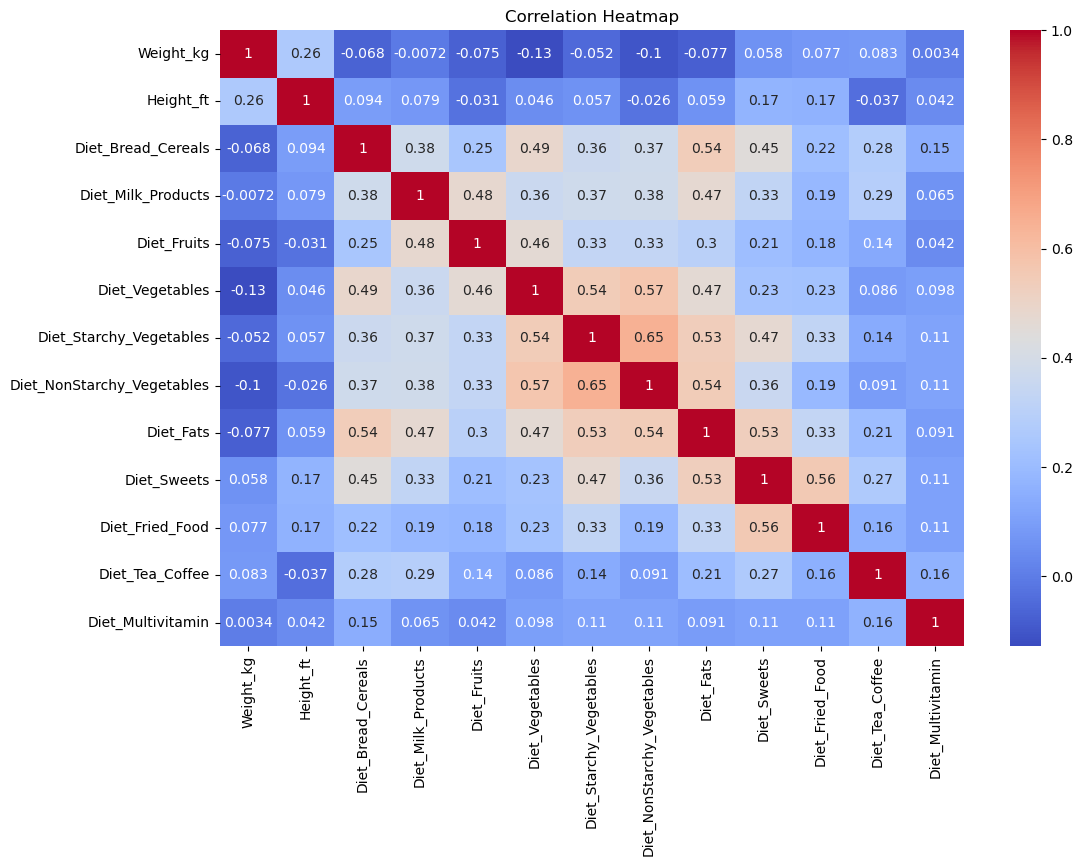

In [5]:
numeric_df = df_encoded.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

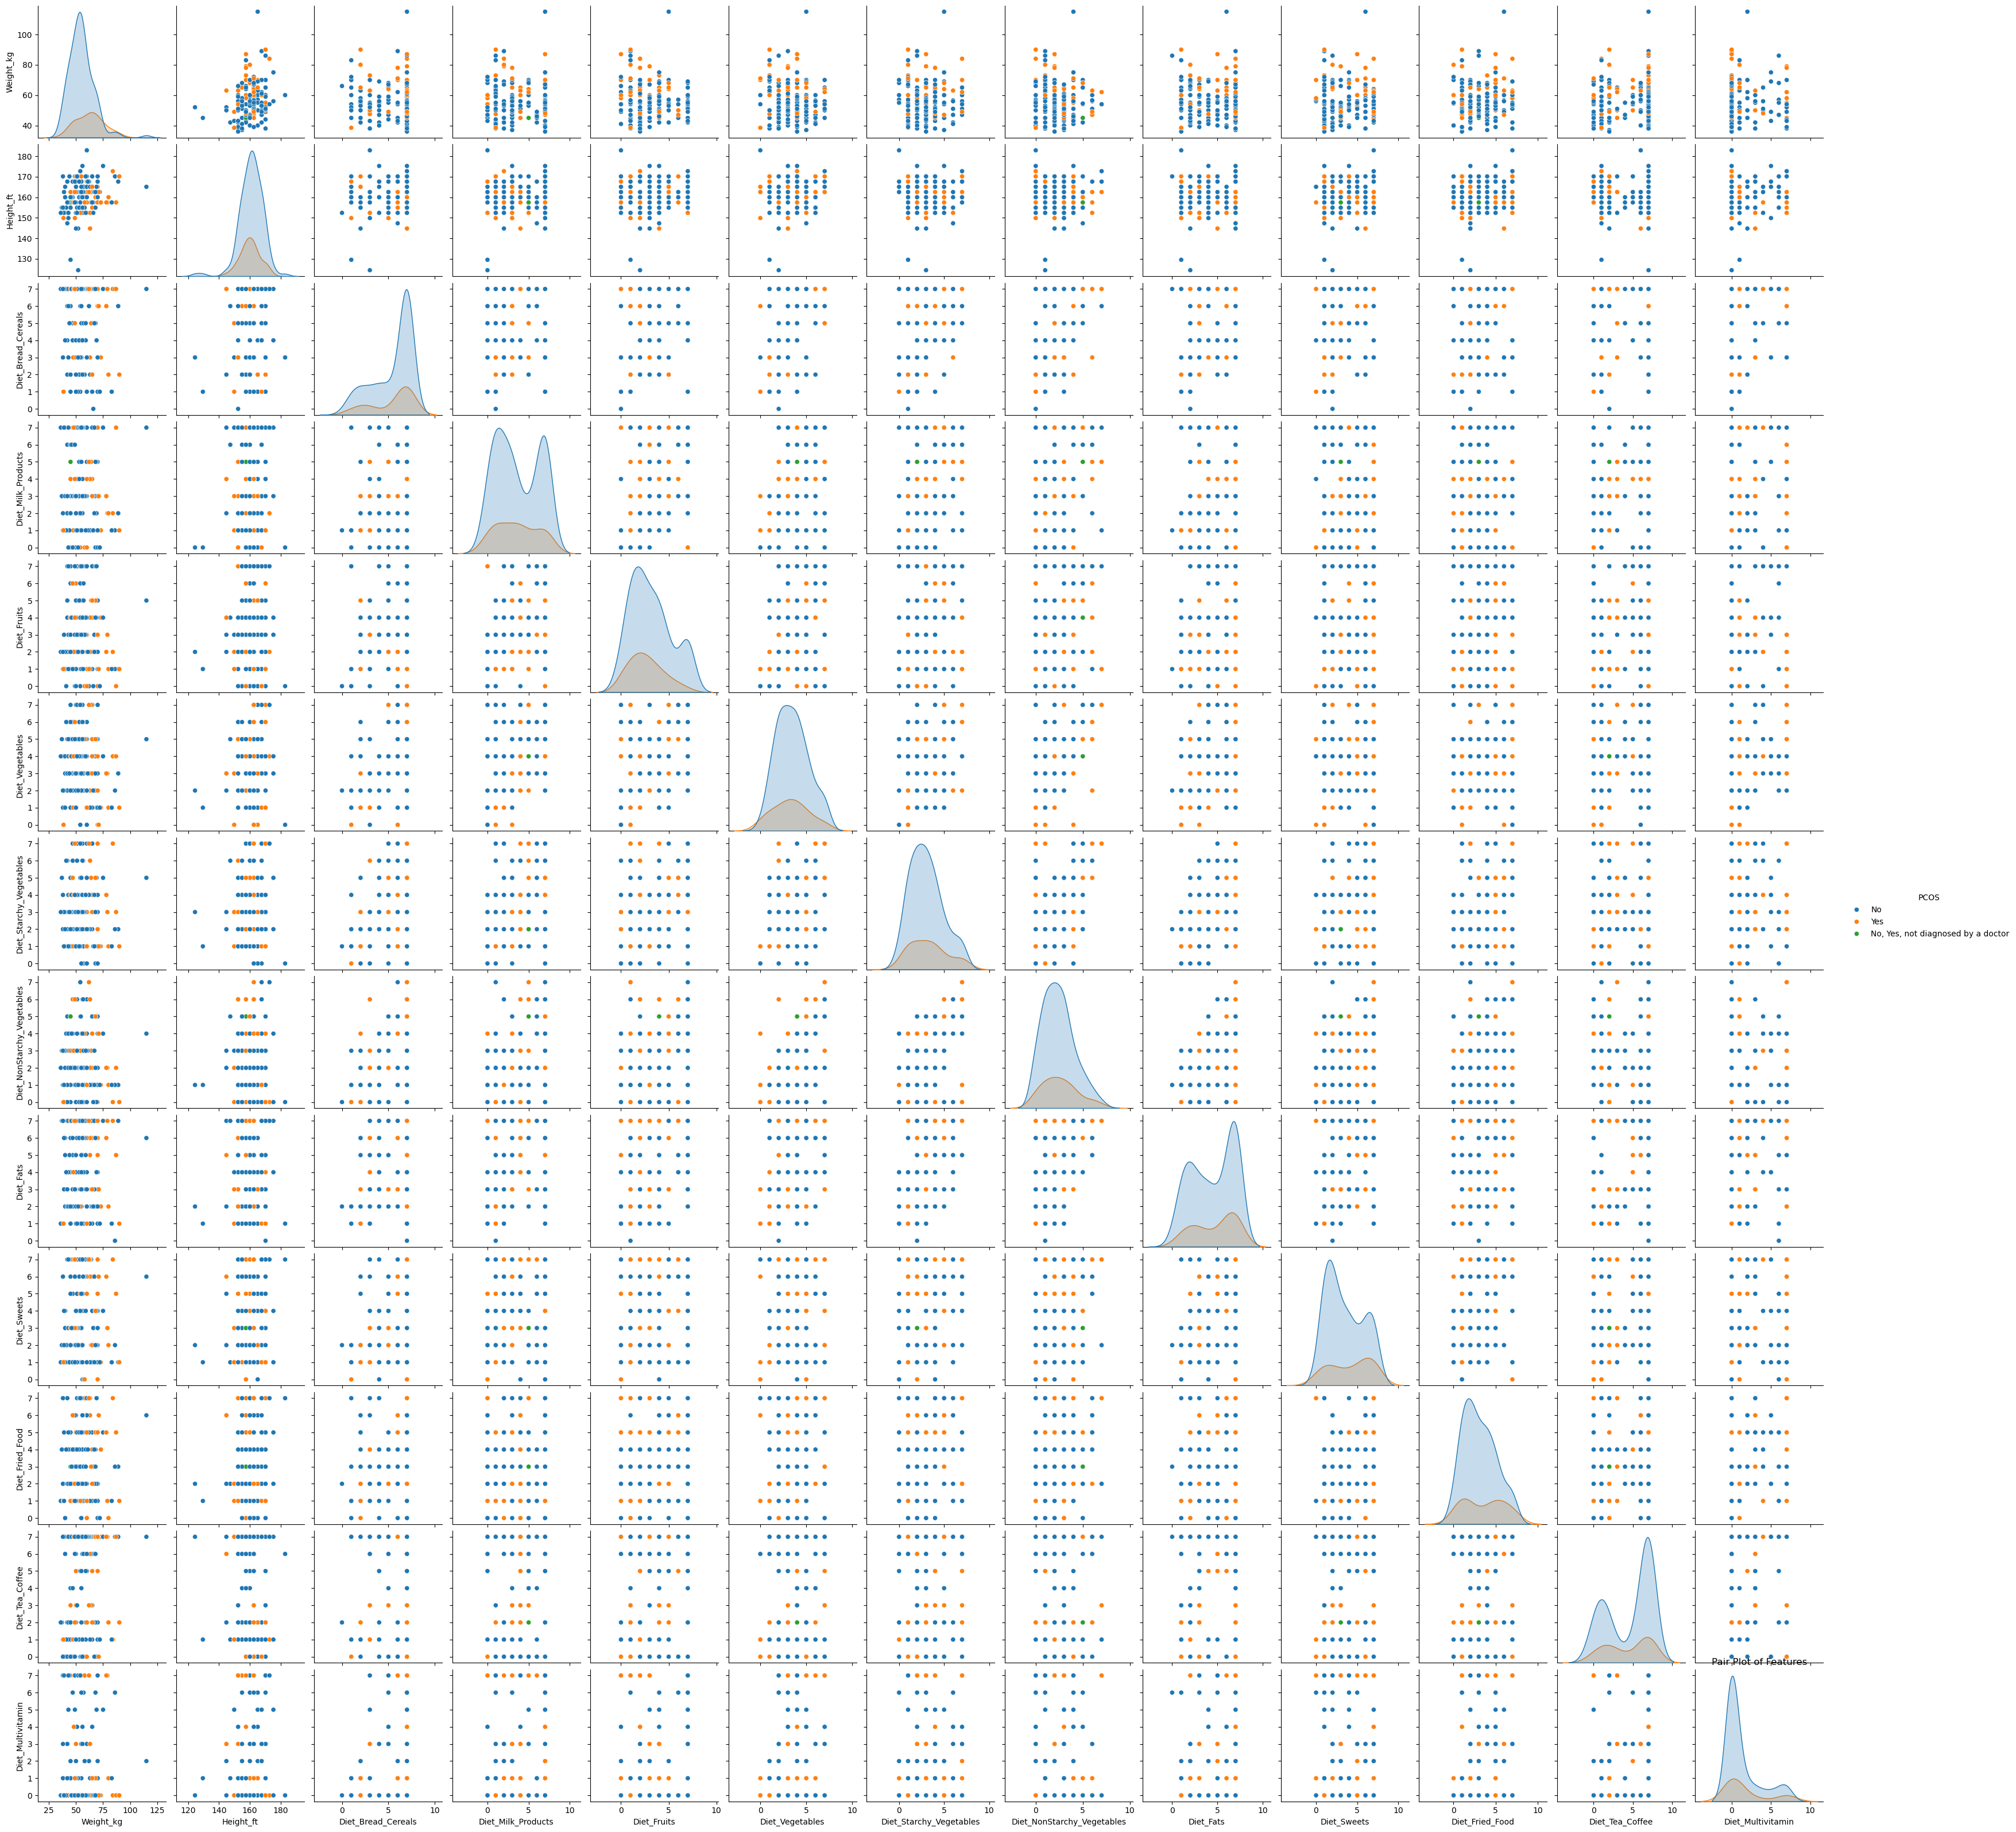

In [6]:
sns.pairplot(df, hue='PCOS')
plt.title('Pair Plot of Features')
plt.show()

In [7]:
df['Height_m'] = df['Height_ft'] * 0.3048  # Convert height from feet to meters
df['BMI'] = df['Weight_kg'] / (df['Height_m'] ** 2)  # Calculate BMI

# Add BMI to the encoded dataframe
df_encoded['BMI'] = scaler.fit_transform(df[['BMI']])

# Display the first few rows with the new BMI feature
df_encoded.head()

,Weight_kg,Height_ft,Diet_Bread_Cereals,Diet_Milk_Products,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Fats,Diet_Sweets,...,Exercise_Benefit_Yes Significantly,PCOS_Medication_Herbal,PCOS_Medication_I took as endocrinologist prescribed me but she said that I don't have PCOS,"PCOS_Medication_I used to take medicine for almost two years, but it had no significant effects. One thing I added to my daily routine is walking for half an hour or more, which has significantly improved my periods.Also recommended my doctors.","PCOS_Medication_Multivitamins, Inositol",PCOS_Medication_No.,PCOS_Medication_Option 2,"PCOS_Medication_Yes, hormonal therapy (e.g., birth control pills)",PCOS_Medication_Yes.. but rn i stopped medication and start organic seeds that helps me a lot,BMI
0,0.788144,-0.434424,0.736679,1.319116,-0.506552,-0.815714,-0.037460,-0.851019,1.079102,-0.275043,...,False,False,False,False,False,True,False,False,False,1.025658
1,-0.045845,0.614255,-0.684646,0.138735,0.472593,0.317768,0.502590,-0.264460,-0.232500,-1.609132,...,False,False,False,False,False,True,False,False,False,-0.307861
2,2.706319,0.963815,0.262904,-0.648186,-0.996124,-0.248973,-0.577511,-0.851019,1.079102,-1.164436,...,False,False,False,False,False,True,False,False,False,2.136694
3,-0.129244,-0.084864,-1.632197,-0.254726,-0.996124,-0.815714,1.042641,0.322099,0.204701,0.614349,...,False,False,False,False,False,True,False,False,False,-0.102493
4,-0.129244,-0.084864,-0.684646,1.319116,-0.506552,-0.248973,0.502590,0.908657,0.641901,-0.719740,...,False,False,False,False,False,True,False,False,False,-0.102493


In [8]:
X = df_encoded.drop('PCOS_Yes', axis=1)
y = df_encoded['PCOS_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.8857142857142857,
 array([[28,  1],
        [ 3,  3]], dtype=int64),
 '              precision    recall  f1-score   support\n\n       False       0.90      0.97      0.93        29\n        True       0.75      0.50      0.60         6\n\n    accuracy                           0.89        35\n   macro avg       0.83      0.73      0.77        35\nweighted avg       0.88      0.89      0.88        35\n')

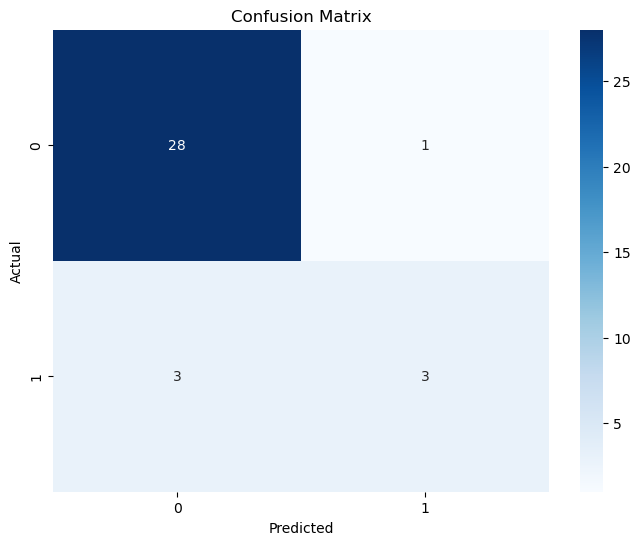

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()